In [1]:
import util.preprocessing as preprocessing
import util.detection_util as detection_util

import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import cv2
import os

import metadataextractor
import util.config as config

from matplotlib import pyplot as plt

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


In [2]:
pre = preprocessing.Preprocessing()
detect = detection_util.DetectionUtil()
img_dic = pre.readImagesRandom()

print (len(img_dic))

df = pd.DataFrame(columns=['id', 'imageName', 'type', 'fsize', 'pigname', 'setversion', 'createdate', 'img_width',
                           'img_height', 'sharpness', 'flash', 'bright', 'contrast', 'sex', 'weight', 'age'])
i = 0


df['fsize'].apply(pd.to_numeric)

2021-03-28 20:00:14,254 - util.preprocessing - INFO - init Preprocessing
2021-03-28 20:00:14,258 - util.detection_util - INFO - init DetectionUtil
2021-03-28 20:00:14,259 - util.preprocessing - INFO - readImages
2021-03-28 20:00:14,260 - util.preprocessing - INFO - image_dir: D:\Users\avatar\OneDrive - Hochschule Luzern\bearbeitet_mit_label\train
100


Series([], Name: fsize, dtype: object)

In [3]:
def showOpenCvImage(img_before, img_after):
    plt.figure(1)
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(img_before, cv2.COLOR_BGR2RGB))
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(img_after, cv2.COLOR_BGR2RGB))
    plt.show()

In [52]:
def getMaxOfColumnAndShowImage(columnName):
    print('Maximum of Column: ', columnName)
    column = df[columnName]
    max_index = column.idxmax()
    max_value = column.max()
    print ('Index of Max:', max_index, ' Value of Max: ', max_value)
    print (df.loc[max_index])
    imageNameOfLoc = df.loc[max_index]['imageName']
    plt.imshow(img_dic[imageNameOfLoc])
    return imageNameOfLoc

In [53]:
def getMinOfColumnAndShowImage(columnName):
    print('Minimum of Column: ', columnName)
    column = df[columnName]
    min_index = column.idxmin()
    min_value = column.min()
    print ('Index of Min:', min_index, ' Value of Min: ', min_value)
    print (df.loc[min_index])
    imageNameOfLoc = df.loc[min_index]['imageName']
    plt.imshow(img_dic[imageNameOfLoc])
    return imageNameOfLoc

In [4]:
for key in img_dic:
    img = img_dic[key]
    img_with_path = os.path.join(config.image_train_dir_path, key)
    size = os.stat(img_with_path).st_size
    pig_name = detect.getPigName(key)
    set_version = detect.getSetVersion(key)
    meta = metadataextractor.MetadataExtractor(img_with_path)
    create_date = meta.getCreateDate()
    img_width = meta.getImageWidth()
    img_height = meta.getImageHeight()
    flash = meta.getFlashMode()
    shrp = pre.computeSharpness(img)
    bright = pre.getBrightness(img)
    contrast = pre.getContrast(img)
    sex = 1
    age = 90
    weight = 100

    df.loc[str(i),:] = [i, key, 'jpg', size, pig_name, set_version, create_date, img_width, img_height, shrp, flash,
                        bright, contrast, sex, weight, age]
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    print('read image:', str(i))

    i = i + 1

read image: 0
read image: 1
read image: 2
read image: 3
read image: 4
read image: 5
read image: 6
read image: 7
read image: 8
read image: 9
read image: 10
read image: 11
read image: 12
read image: 13
read image: 14
read image: 15
read image: 16
read image: 17
read image: 18
read image: 19
read image: 20
read image: 21
read image: 22
read image: 23
read image: 24
read image: 25
read image: 26
read image: 27
read image: 28
read image: 29
read image: 30
read image: 31
read image: 32
read image: 33
read image: 34
read image: 35
read image: 36
read image: 37
read image: 38
read image: 39
read image: 40
read image: 41
read image: 42
read image: 43
read image: 44
read image: 45
read image: 46
read image: 47
read image: 48
read image: 49
read image: 50
read image: 51
read image: 52
read image: 53
read image: 54
read image: 55
read image: 56
read image: 57
read image: 58
read image: 59
read image: 60
read image: 61
read image: 62
read image: 63
read image: 64
read image: 65
read image: 66
read 

In [5]:
print(df.head().to_string())

  id             imageName type    fsize pigname setversion           createdate img_width img_height  sharpness flash     bright contrast sex weight age
0  0  DSC_V2_6422_2672.JPG  jpg  5920030    6422         V2  2021:03:16 03:13:15      4288       2848  97.780524   [7]  96.054399      1.0   1    100  90
1  1  DSC_V1_6503_1970.JPG  jpg  4972805    6503         V1  2021:02:02 06:25:21      4288       2848  44.669976   [7]  67.448352      1.0   1    100  90
2  2  DSC_V2_6377_2797.JPG  jpg  5388009    6377         V2  2021:03:16 03:42:50      4288       2848   68.91052   [7]   75.25012      1.0   1    100  90
3  3  DSC_V1_6566_2235.JPG  jpg  5081908    6566         V1  2021:02:02 07:01:08      4288       2848  46.349594   [7]  50.483245      1.0   1    100  90
4  4  DSC_V1_6536_1882.JPG  jpg  3448964    6536         V1  2021:02:02 06:11:27      4288       2848  10.612921   [7]  55.846361      1.0   1    100  90


In [11]:
df = df.astype({'id': 'int', 'imageName': 'str', 'type': 'str'})
df['fsize'] = pd.to_numeric(df["fsize"])
df['sharpness'] = pd.to_numeric(df["sharpness"])
df['sharpness'] = df['sharpness'].astype(int) 
df['bright'] = df['bright'].astype(int)
pd.to_numeric(df['sharpness'])
df.dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          100 non-null    int32 
 1   imageName   100 non-null    object
 2   type        100 non-null    object
 3   fsize       100 non-null    int64 
 4   pigname     100 non-null    object
 5   setversion  100 non-null    object
 6   createdate  100 non-null    object
 7   img_width   100 non-null    object
 8   img_height  100 non-null    object
 9   sharpness   100 non-null    int32 
 10  flash       100 non-null    object
 11  bright      100 non-null    int32 
 12  contrast    100 non-null    object
 13  sex         100 non-null    object
 14  weight      100 non-null    object
 15  age         100 non-null    object
dtypes: int32(3), int64(1), object(12)
memory usage: 16.2+ KB


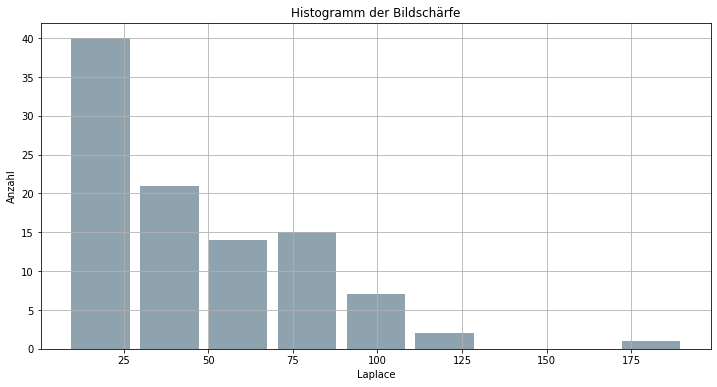

Maximum of Column:  sharpness
Index of Max: 8  Value of Max:  191
id                               8
imageName     DSC_V1_6578_2099.JPG
type                           jpg
fsize                      4990548
pigname                       6578
setversion                      V1
createdate     2021:02:02 06:41:02
img_width                     4288
img_height                    2848
sharpness                      191
flash                          [7]
bright                          56
contrast                       1.0
sex                              1
weight                         100
age                             90
Name: 8, dtype: object


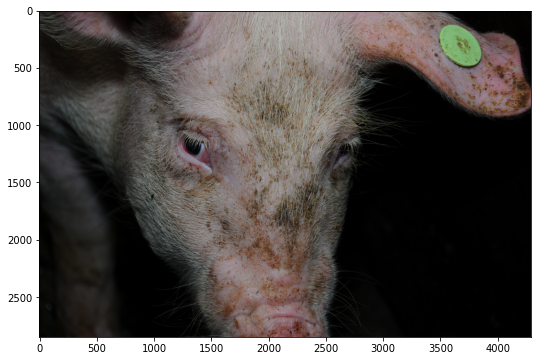

In [62]:
import matplotlib.pyplot as plt
df['sharpness'].hist(bins='auto',color='#607c8e',alpha=0.7, rwidth=0.85)
plt.title('Histogramm der Bildschärfe')
plt.xlabel('Laplace')
plt.ylabel('Anzahl')
plt.show()

image_name_max_sharpness = getMaxOfColumnAndShowImage('sharpness')


Minimum of Column:  sharpness
Index of Min: 75  Value of Min:  8
id                              75
imageName     DSC_V2_6367_2559.JPG
type                           jpg
fsize                      2980574
pigname                       6367
setversion                      V2
createdate     2021:03:16 02:35:34
img_width                     4288
img_height                    2848
sharpness                        8
flash                          [7]
bright                          59
contrast                       1.0
sex                              1
weight                         100
age                             90
Name: 75, dtype: object


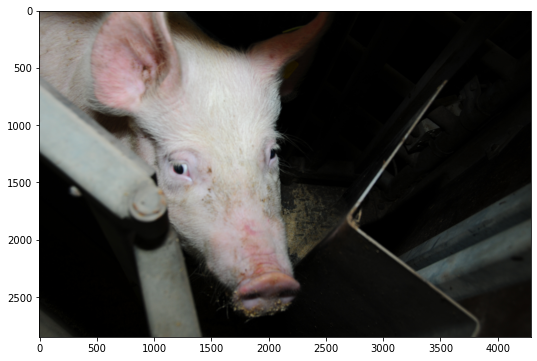

In [56]:
image_name_min_sharpness = getMinOfColumnAndShowImage('sharpness')

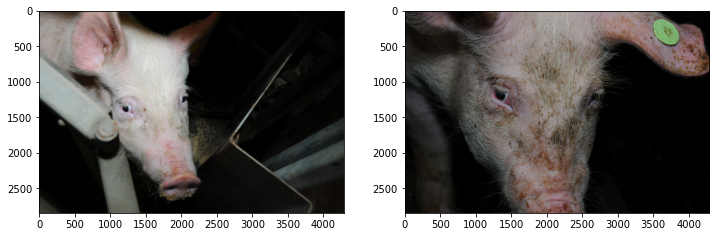

In [57]:
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_dic[image_name_min_sharpness]);
ax[1].imshow(img_dic[image_name_max_sharpness]);

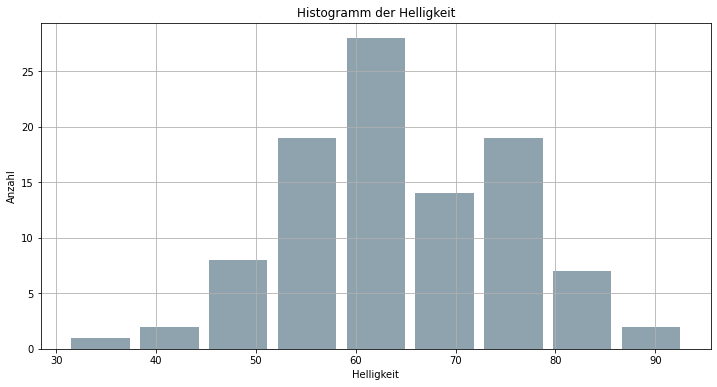

Maximum of Column:  bright
Index of Max: 16  Value of Max:  93
id                              16
imageName     DSC_V2_6367_2564.JPG
type                           jpg
fsize                      4370025
pigname                       6367
setversion                      V2
createdate     2021:03:16 02:37:17
img_width                     4288
img_height                    2848
sharpness                       29
flash                          [7]
bright                          93
contrast                       1.0
sex                              1
weight                         100
age                             90
Name: 16, dtype: object


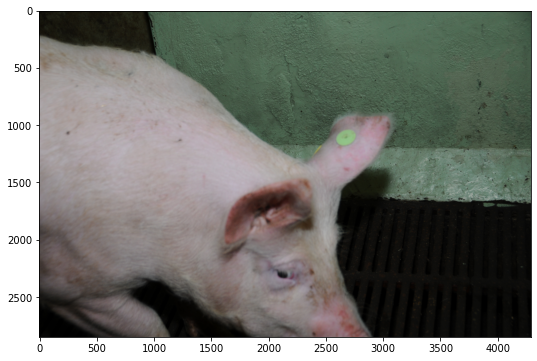

In [59]:
df['bright'].hist(bins='auto',color='#607c8e',alpha=0.7, rwidth=0.85)
plt.title('Histogramm der Helligkeit')
plt.xlabel('Helligkeit')
plt.ylabel('Anzahl')
plt.show()


image_name_max_brightness = getMaxOfColumnAndShowImage('bright')



Minimum of Column:  bright
Index of Min: 23  Value of Min:  31
id                              23
imageName     DSC_V1_6494_2109.JPG
type                           jpg
fsize                      3188536
pigname                       6494
setversion                      V1
createdate     2021:02:02 06:42:44
img_width                     4288
img_height                    2848
sharpness                        9
flash                          [3]
bright                          31
contrast                       1.0
sex                              1
weight                         100
age                             90
Name: 23, dtype: object


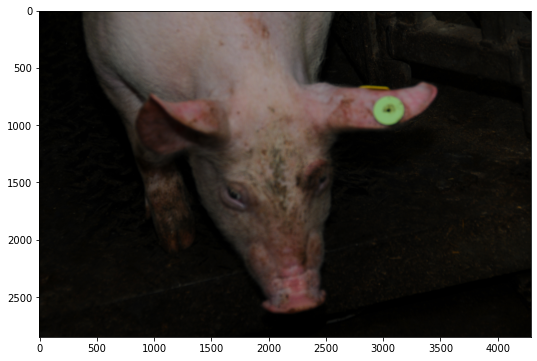

In [60]:
image_name_min_brightness = getMinOfColumnAndShowImage('bright')

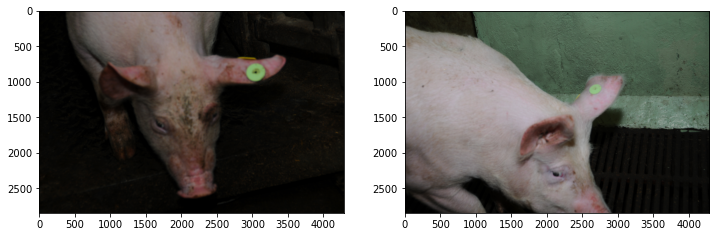

In [61]:
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_dic[image_name_min_brightness]);
ax[1].imshow(img_dic[image_name_max_brightness]);

In [9]:
df[{'id': 'int', 'imageName': 'str', 'type': 'str', 'pigname': 'str', 'setversion': 'str', 'createdate': 'date', 'img_width': 'int', 'img_height': 'int'}]

,id,imageName,type,pigname,setversion,createdate,img_width,img_height
0,0,DSC_V1_6559_2181.JPG,jpg,6559,V1,2021:02:02 06:53:34,4288,2848
1,1,DSC_V1_6507_1999.JPG,jpg,6507,V1,2021:02:02 06:28:34,4288,2848
2,2,DSC_V1_6501_2399.JPG,jpg,6501,V1,2021:02:02 07:28:17,4288,2848
3,3,DSC_V1_6560_2088.JPG,jpg,6560,V1,2021:02:02 06:39:31,4288,2848
4,4,DSC_V1_6552_2221.JPG,jpg,6552,V1,2021:02:02 06:59:25,4288,2848
...,...,...,...,...,...,...,...,...
195,195,DSC_V2_6409_2688.JPG,jpg,6409,V2,2021:03:16 03:16:50,4288,2848
196,196,DSC_V1_6560_2091.JPG,jpg,6560,V1,2021:02:02 06:39:52,4288,2848
197,197,DSC_V1_6512_2363.JPG,jpg,6512,V1,2021:02:02 07:20:12,4288,2848
198,198,DSC_V2_6377_2794.JPG,jpg,6377,V2,2021:03:16 03:42:45,4288,2848
